### Feature map visualization (Tensorflow)

OmniXAI provides a simple explainer for visualizing feature maps of a specified layer.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.preprocessing.image import Resize
from omnixai.explainers.vision.specific.feature_visualization.visualizer import \
    FeatureMapVisualizer

Let's load a test image:

In [3]:
img = img = Resize((224, 224)).transform(
    Image(PilImage.open("../data/images/dog_cat_2.png").convert("RGB")))

Here we choose the VGG16 model for demonstration (you may test other CNN models, e.g., ResNet). The preprocessing function converts the image input (an `Image` instance) into the model input.

In [4]:
model = vgg16.VGG16()

def preprocess(images):
    data = []
    for i in range(len(images)):
        im = tf.keras.preprocessing.image.img_to_array(images[i].to_pil())
        data.append(np.expand_dims(im, axis=0))
    data = np.concatenate(data, axis=0)
    vgg16.preprocess_input(data)
    return data

2022-09-08 14:48:14.038022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We then create a `FeatureMapVisualizer` explainer by setting the model, the target layer to analyze and the preprocessing function.

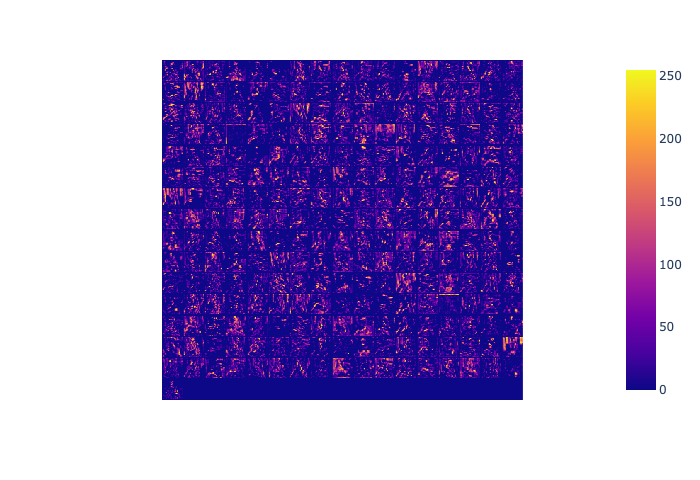

In [5]:
explainer = FeatureMapVisualizer(
    model=model,
    target_layer=model.layers[10],
    preprocess_function=preprocess
)
explanations = explainer.explain(img)
explanations.ipython_plot()